In [3]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

In [4]:
# Load & preprocess MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


# Normalize & reshape for CNN input
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train[..., tf.newaxis]  # shape becomes (batch, 28, 28, 1)
x_test = x_test[..., tf.newaxis]

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [7]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
def create_cnn_model():
    inputs = layers.Input(shape=(28, 28, 1))

    # Conv Block 1
    x = layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # Conv Block 2
    x = layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(0.35)(x)

    # Conv Block 3
    x = layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # Fully Connected Layers
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    return Model(inputs, outputs)


In [10]:

# Instantiate model
cnn_model = create_cnn_model()

# Compile
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [11]:

# Callbacks
lr_schedule = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train
history_cnn = cnn_model.fit(x_train, y_train,
                            validation_split=0.2,
                            epochs=50,
                            batch_size=128,
                            callbacks=[early_stop, lr_schedule],
                            verbose=1)


Epoch 1/50
375/375 [==============================] - 66s 174ms/step - loss: 0.9738 - accuracy: 0.8196 - val_loss: 1.5739 - val_accuracy: 0.5763 - lr: 0.0010
Epoch 2/50
375/375 [==============================] - 62s 166ms/step - loss: 0.4321 - accuracy: 0.9601 - val_loss: 0.3176 - val_accuracy: 0.9804 - lr: 0.0010
Epoch 3/50
375/375 [==============================] - 64s 170ms/step - loss: 0.3194 - accuracy: 0.9691 - val_loss: 0.2181 - val_accuracy: 0.9902 - lr: 0.0010
Epoch 4/50
375/375 [==============================] - 64s 170ms/step - loss: 0.2454 - accuracy: 0.9764 - val_loss: 0.1813 - val_accuracy: 0.9897 - lr: 0.0010
Epoch 5/50
375/375 [==============================] - 65s 174ms/step - loss: 0.2081 - accuracy: 0.9775 - val_loss: 0.1550 - val_accuracy: 0.9903 - lr: 0.0010
Epoch 6/50
375/375 [==============================] - 61s 162ms/step - loss: 0.1900 - accuracy: 0.9781 - val_loss: 0.1429 - val_accuracy: 0.9895 - lr: 0.0010
Epoch 7/50
375/375 [==============================] 

In [12]:
# Evaluate
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")


Final Test Accuracy: 0.9966


In [13]:
import matplotlib.pyplot as plt

In [14]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

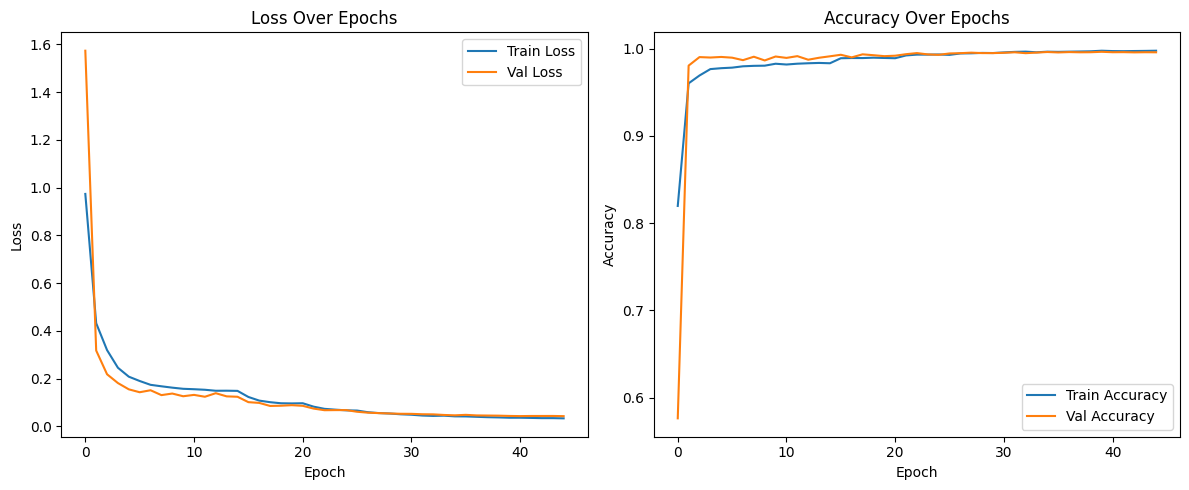

In [15]:
plot_training_history(history_cnn)

# Model Performance Summary

Key Performance Metrics

|Metric |	Value|
|--------|--------|
|Final Test Accuracy|	99.66%|
|Best Validation Accuracy|	99.62%|
|Lowest Validation Loss|	0.0427|
|Epochs Trained|	45 (out of 50)|


Model Architecture and Training

The model is a deep CNN designed for image classification, incorporating modern techniques to enhance performance and prevent overfitting.

Architecture: The network is built with three convolutional blocks followed by two fully connected (Dense) layers.
        Convolutional Blocks: Each block contains Conv2D layers, BatchNormalization, ReLU activation, MaxPooling2D for down-sampling, and Dropout.
Regularization: The model effectively combats overfitting using a multi-faceted approach:
            L2 Regularization (with a factor of 0.001) is applied to all convolutional and dense layers.
            Dropout is used after each convolutional block (rates of 0.3, 0.35, and 0.3) and in the fully connected section (rate of 0.4).
            Batch Normalization is used after each convolutional layer to stabilize and accelerate training.
Optimizer: The model was compiled with the Adam optimizer, starting with a learning rate of 0.001.
Intelligent Callbacks:
ReduceLROnPlateau: This callback automatically reduced the learning rate by 50% whenever the validation accuracy plateaued for 3 epochs. This was critical for fine-tuning the model.
EarlyStopping: Training was automatically halted after the validation accuracy did not improve for 5 consecutive epochs. The model's best-performing weights were restored, ensuring optimal performance without unnecessary training time.

Learnings and Observations

Effective Overfitting Control: The combination of L2 regularization, multiple Dropout layers, and Batch Normalization was highly successful. The training and validation curves on the accuracy/loss plot track each other very closely, indicating that the model generalized well from the training data to unseen validation data.

Dynamic Learning Rate is Crucial: The ReduceLROnPlateau callback was instrumental in achieving the high accuracy. The learning rate was systematically lowered from 0.001 down to 1.5625e-05 during training, allowing the model to make large adjustments early on and then carefully converge to a better solution.

High Efficiency and Accuracy: A final test accuracy of 99.66% is an excellent result for the MNIST dataset. The use of EarlyStopping ensured that this peak performance was achieved efficiently, saving computational resources.